# Clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Part1: Data preparation

In [3]:
# Read the data from the file
# Data from https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv
df = pd.read_csv('Data_P5_Theory.csv')

In [4]:
# Check the first few lines to see the column names and type of content
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Size of the dataframe
len(df)

18249

In [6]:
# Remove rows with empty values
df = df.replace(r'^\s*$', float('NaN'), regex = True)
df.dropna(inplace = True)
len(df)

18249

In [7]:
# Let us check the types of the different columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [36]:
# Let us adapt the dataframe (remove IDs, and make sure that columns have the right type)
df.Date = pd.to_datetime(df.Date)
df['Month'] = pd.DatetimeIndex(df.Date).month

## Part 2: Data exploration

In [38]:
# Lets see the summary of the numerical columns
X=df[['Month','Small Bags', 'Large Bags', 'XLarge Bags']]
X.describe()

,Month,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,18249.000000
mean,6.177215,1.821947e+05,5.433809e+04,3106.426507
std,3.534130,7.461785e+05,2.439660e+05,17692.894652
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.000000,2.849420e+03,1.274700e+02,0.000000
50%,6.000000,2.636282e+04,2.647710e+03,0.000000
75%,9.000000,8.333767e+04,2.202925e+04,132.500000
max,12.000000,1.338459e+07,5.719097e+06,551693.650000


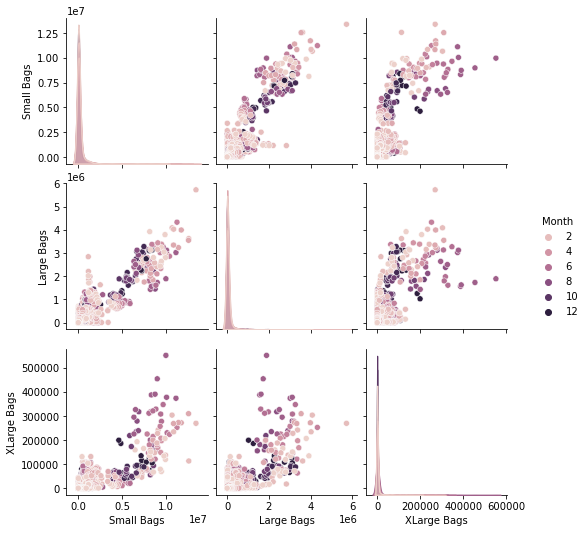

In [40]:
# Matrix scatter plot
fig = sns.pairplot(X, hue='Month',vars=["Small Bags", "Large Bags", "XLarge Bags"],kind='scatter')

In [41]:
# Let us explore the correlation matrix
corrMatrix = X.corr()
print (corrMatrix)

                Month  Small Bags  Large Bags  XLarge Bags
Month        1.000000   -0.023126   -0.020187    -0.012969
Small Bags  -0.023126    1.000000    0.902589     0.806845
Large Bags  -0.020187    0.902589    1.000000     0.710858
XLarge Bags -0.012969    0.806845    0.710858     1.000000


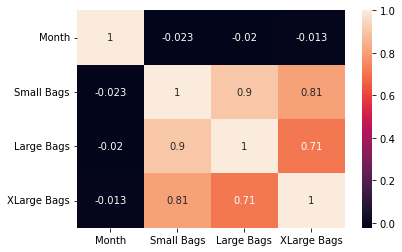

In [42]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [49]:
# Mean of each variable
X.iloc[:,-3:].mean(axis=0)

Small Bags     182194.686696
Large Bags      54338.088145
XLarge Bags      3106.426507
dtype: float64

In [50]:
# Standard deviation of each variable
X.iloc[:,-3:].std(axis=0)

Small Bags     746178.514962
Large Bags     243965.964547
XLarge Bags     17692.894652
dtype: float64

## Clustering

Clustering is one of those tools that do not imply pairs (X,y), but only a collection of {x}.

In [53]:
# Let us normalize the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X.iloc[:,-3:])
Xnorm = scaler.transform(X.iloc[:,-3:])

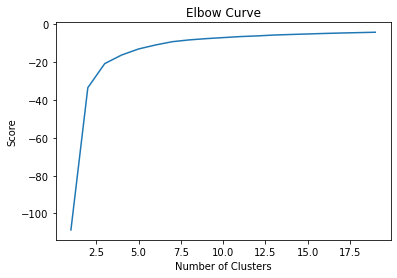

In [57]:
# Let us observe the classification error as a function of the number of clusters
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Xnorm).score(Xnorm) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [60]:
# Quantize the input data to 5 clusters
kmeans = KMeans(n_clusters=5).fit(Xnorm)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.00442314 0.00320551 0.00115674]
 [0.55368187 0.41178115 0.19877874]
 [0.18194255 0.17557865 0.02867494]
 [0.07336166 0.03725914 0.04404035]
 [0.70719786 0.52246422 0.51973377]]


C:\Users\plosa\AppData\Local\Temp\ipykernel_19956\868010113.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'XLarge')

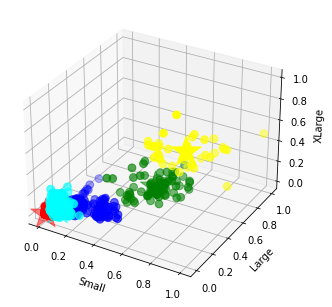

In [63]:
# Get the labels of each observation
labels = kmeans.predict(Xnorm)

# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan','yellow']
assignment=[]
for row in labels:
    assignment.append(colors[row])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xnorm[:, 0], Xnorm[:, 1], Xnorm[:, 2], c=assignment, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
ax.set_xlabel('Small')
ax.set_ylabel('Large')
ax.set_zlabel('XLarge')

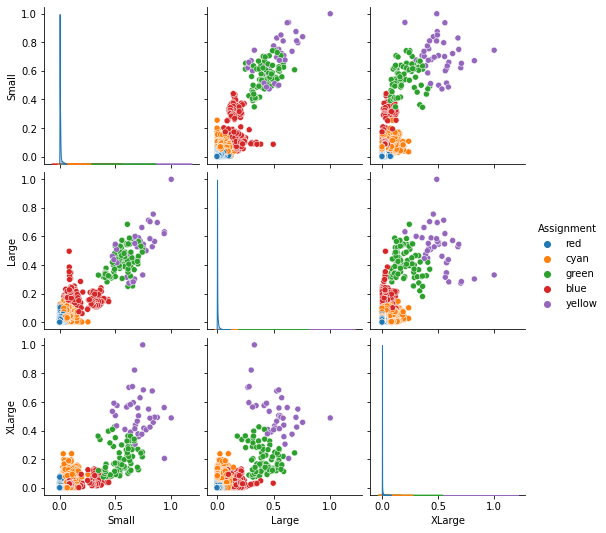

In [69]:
Xnorm=pd.DataFrame(Xnorm, columns=['Small', 'Large', 'XLarge'])
Xnorm['Assignment']=assignment
fig = sns.pairplot(Xnorm, hue='Assignment',vars=["Small", "Large", "XLarge"], kind='scatter')